In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load Dataset
df = pd.read_csv("/content/Price_Agriculture_commodities_Week.csv.zip")

In [ ]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [ ]:
print(df.head())

     State District    Market              Commodity      Variety Grade  \
0  Gujarat   Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   FAQ   
1  Gujarat   Amreli  Damnagar                Brinjal        Other   FAQ   
2  Gujarat   Amreli  Damnagar                Cabbage      Cabbage   FAQ   
3  Gujarat   Amreli  Damnagar            Cauliflower  Cauliflower   FAQ   
4  Gujarat   Amreli  Damnagar      Coriander(Leaves)    Coriander   FAQ   

  Arrival_Date  Min Price  Max Price  Modal Price  
0   27-07-2023     4100.0     4500.0       4350.0  
1   27-07-2023     2200.0     3000.0       2450.0  
2   27-07-2023     2350.0     3000.0       2700.0  
3   27-07-2023     7000.0     7500.0       7250.0  
4   27-07-2023     8400.0     9000.0       8850.0  


In [ ]:
# Convert Date column to datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])


<ipython-input-71-82f66c9564e5>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])


In [ ]:
# Check for missing values
print(df.isnull().sum())


State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64


In [ ]:
# Fill missing values (if any) with median values
df.fillna(df.median(numeric_only=True), inplace=True)

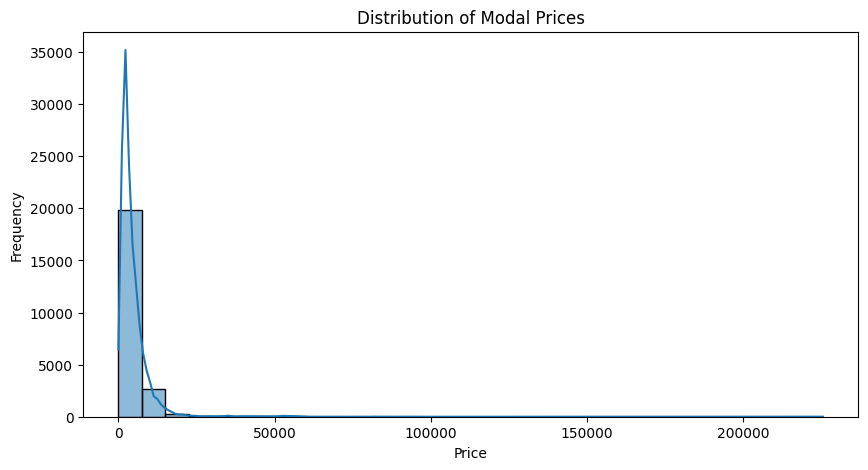

In [ ]:
# EDA: Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Modal Price'], bins=30, kde=True)
plt.title('Distribution of Modal Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

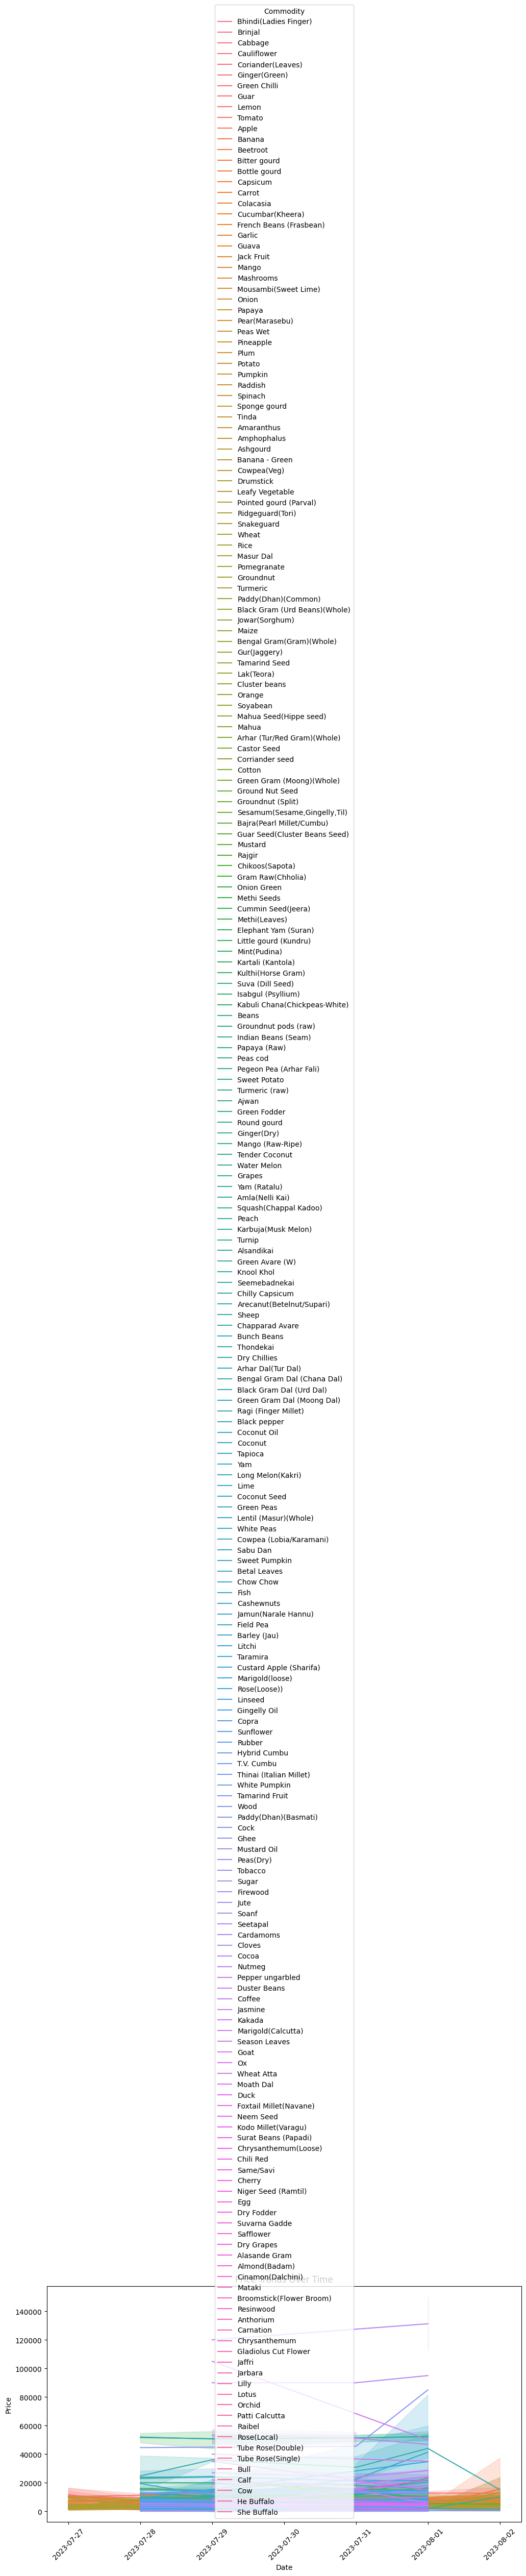

In [ ]:
# EDA: Price Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Arrival_Date', y='Modal Price', hue='Commodity')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

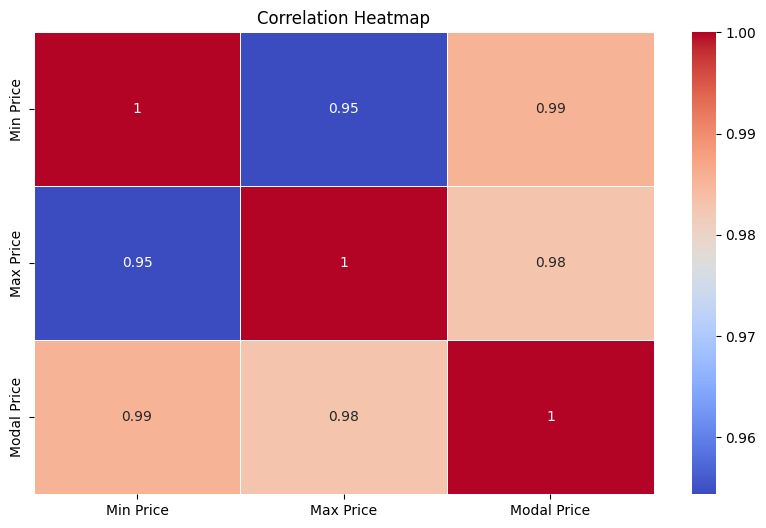

In [ ]:
# EDA: Heatmap of Price Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Prepare Data for Prediction
features = ['Min Price', 'Max Price']  # Using Min & Max price to predict Modal Price
target = 'Modal Price'
X = df[features]
y = df[target]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 137.2584718190065
RMSE: 476.9881543628869


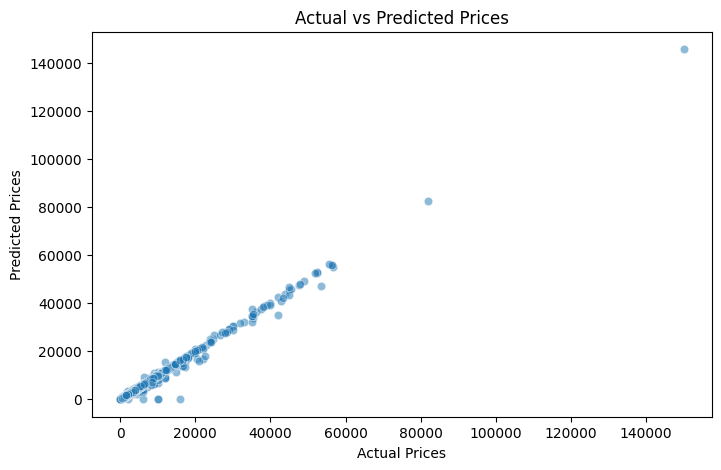

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
# User Input for Prediction
def predict_price(min_price, max_price):
    input_data = np.array([[min_price, max_price]])
    predicted_price = model.predict(input_data)
    return predicted_price[0]

In [ ]:
# Example Usage
min_price_input = float(input("Enter Minimum Price: "))
max_price_input = float(input("Enter Maximum Price: "))
predicted_price = predict_price(min_price_input, max_price_input)
print(f'Predicted Model Price: {predicted_price}')

Enter Minimum Price: 4100
Enter Maximum Price: 5300
Predicted Model Price: 4688.004497556625


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
